In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Dependencies

In [65]:
# !pip install -r requirements.txt

### 2. Imports

In [66]:
import os
import sys
import pathlib
import openai

# Add the src directory to the path
sys.path.insert(0, str(pathlib.Path('src')))

In [67]:
from constants import DEFAULT_LOG_PATH, Models, MODELS_COST
from openai_cost_tracker_viz import OpenAICostTrackerViz
from openai_cost_tracker_utils import OpenAICostTrackerUtils
from openai_cost_tracker import OpenAICostTracker

### 3. Set API key environment variable

In [68]:
# Export the proper environment variables based on the client you are using.

# OpenAI API Key
os.environ["OPENAI_ORGANIZATION"] = OpenAICostTrackerUtils.get_api_key(path='openai_organization.txt')
os.environ["OPENAI_API_KEY"] = OpenAICostTrackerUtils.get_api_key(path='openai_api_key.txt')

# Azure OpenAI API Key
os.environ["AZURE_OPENAI_KEY"] = OpenAICostTrackerUtils.get_api_key('azure_openai_key.txt')

### 4. Input Arguments

In [69]:
experiment_name = "Demo"
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the euro 2020?"},
]
cost_upperbound = 2
log_folder = DEFAULT_LOG_PATH

In [70]:
# Azure OpenAI usage
model = Models.AZURE_3_5_TURBO
client_args = {
    "azure_endpoint": "https://your_key.openai.azure.com/",
    "api_key": os.getenv("AZURE_OPENAI_KEY"),
    "api_version": "your_api_version",
}
input_cost = MODELS_COST[model.value]["input"]
output_cost = MODELS_COST[model.value]["output"]

In [71]:
# OpenAI usage
client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
model = Models.TURBO_3_5
client_args = {}
input_cost = MODELS_COST[model.value]["input"]
output_cost = MODELS_COST[model.value]["output"]

### 5. Demo

In [72]:
# Create the OpenAICostTracker object
cost_tracker = OpenAICostTracker(
    experiment_name = experiment_name,
    model = model.value,
    input_cost = input_cost,
    output_cost = output_cost,
    log_folder = log_folder,
    cost_upperbound = cost_upperbound
)

In [73]:
# Run the chat completion
response = client.chat.completions.create(model=model.value, messages=messages, max_tokens=1, temperature=0)

print(response.choices[0].message.content)

cost_tracker.update_cost(response)

Italy


### 6. Data Visualization

In [74]:
# Print the total cost
OpenAICostTrackerViz.print_total_cost(path=DEFAULT_LOG_PATH)

Total cost: 1.4e-05 (USD)


In [75]:
# Cost by model
OpenAICostTrackerViz.print_total_cost_by_model(path=DEFAULT_LOG_PATH)

gpt-3.5-turbo: 1.4e-05 (USD)


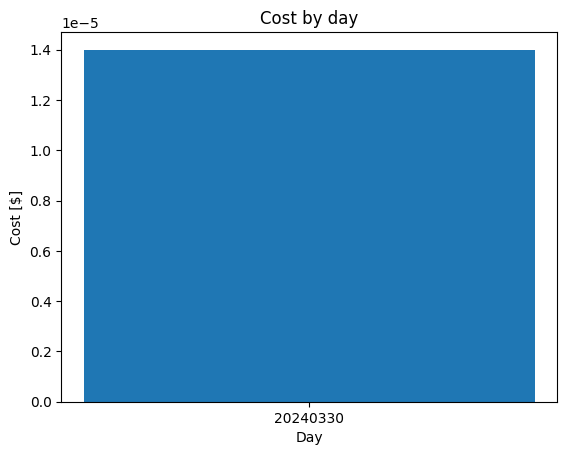

In [76]:
# Visualize the cost by day
OpenAICostTrackerViz.plot_cost_by_day(path=DEFAULT_LOG_PATH)